# A recent water mass definition

Data for the paper
- https://www.ncei.noaa.gov/access/ocean-carbon-acidification-data-system/oceans/ndp_107/ndp107.html
- https://omp.geomar.de/watermass.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import gsw

In [3]:
df = pd.read_csv("data/Atlantic_WMs_GLODAPv2.csv", encoding='unicode_escape', header=[0, 1])

In [4]:
# pressure to depth conversion
df["LEV_M"] = gsw.conversions.z_from_p(p=df["Pressure", "dbar"], lat=df["Latitude", "deg"])*(-1)

In [5]:
df["main_wm"] = df[[('ENACW', 'Unnamed: 7_level_1'), ('WNACW','WM fraction'), ('ESACW','WM fraction'), ('WSACW', 'WM fraction'), 
                    ('AAIW', 'WM fraction'), ('SAIW', 'WM fraction'), ('MW', 'WM fraction'), ('upper NADW', 'WM fraction'), 
                    ('lower NADW', 'WM fraction'), ('LSW', 'WM fraction'), ('ISOW', 'WM fraction'), ('DSOW', 'WM fraction'),
                    ('AABW', 'WM fraction'), ('NEABW', 'WM fraction'), ('CDW', 'WM fraction'), ('WSBW', 'WM fraction')]].apply(
                    lambda x: x.idxmax()[0], axis=1)

In [6]:
df

,Cruise,Station,Longitude,Latitude,Pressure,Conservative Temp,Absolute Salinity,ENACW,WNACW,ESACW,...,lower NADW,LSW,ISOW,DSOW,AABW,NEABW,CDW,WSBW,LEV_M,main_wm
,Unnamed: 0_level_1,Unnamed: 1_level_1,deg,deg,dbar,°C,Unnamed: 6_level_1,Unnamed: 7_level_1,WM fraction,WM fraction,...,WM fraction,WM fraction,WM fraction,WM fraction,WM fraction,WM fraction,WM fraction,WM fraction,,
0,2,234.0,-0.99,-58.48,8.80,-1.278,34.311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,8.717932,WSBW
1,2,234.0,-0.99,-58.48,8.80,NaN,34.309,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,8.717932,WSBW
2,2,234.0,-0.99,-58.48,15.10,NaN,34.302,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.958950,ENACW
3,2,234.0,-0.99,-58.48,20.00,NaN,34.323,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.812944,ENACW
4,2,234.0,-0.99,-58.48,20.50,-1.354,34.323,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,20.308243,WSBW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372055,723,1213.0,-9.53,42.14,1008.52,11.176,36.374,0.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998.173298,MW
372056,723,1213.0,-9.53,42.14,1113.11,10.94,36.396,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.415837,MW
372057,723,1213.0,-9.53,42.14,1262.23,10.56,36.38,NaN,NaN,NaN,...,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1248.526655,MW


/albedo/home/yvjennig/.conda/envs/cluster_validation/lib/python3.11/site-packages/mpl_toolkits/basemap/__init__.py:518: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  param = float(param)


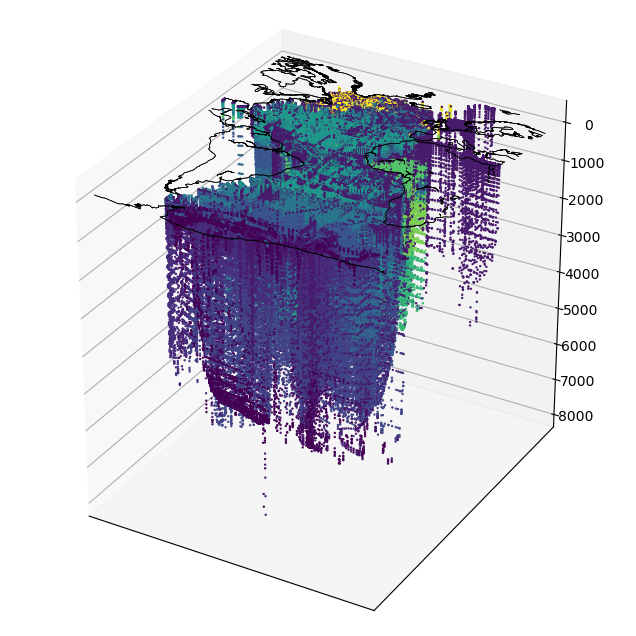

In [98]:
mymap = Basemap(llcrnrlon=df["Longitude"].min(), llcrnrlat=df["Latitude"].min(),
              urcrnrlon=df["Longitude"].max(), urcrnrlat=df["Latitude"].max())

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["Longitude"], df["Latitude"], df["LEV_M"], s=2, alpha=1, marker=".", c=pd.factorize(df.main_wm)[0])
ax.add_collection3d(mymap.drawcoastlines(linewidth=0.5))
ax.set_box_aspect((np.ptp(df["Longitude"]), np.ptp(df["Latitude"]), np.ptp(df["LEV_M"]) / 50))  # aspect ratio is 1:1:1 in data space
plt.gca().invert_zaxis()
plt.show()